# Bibliotecas

In [70]:
# Biblioteca de tratamento de dados
import pandas as pd
import numpy as np

# Biblioteca de Data Viz
import seaborn as sns
import matplotlib.pyplot as plt

# Biblioteca para separ em treino e teste
from sklearn.model_selection import train_test_split

# Pré processamento de dados
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import Normalizer

# Modelos utlizados
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Bibliotrecas de Validação dos modelos
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Biblioteca de Validação Cruzada
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint



# Importando os dados

In [71]:
!kaggle datasets download -d rabieelkharoua/alzheimers-disease-dataset

Dataset URL: https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
alzheimers-disease-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [72]:
!unzip alzheimers-disease-dataset.zip -d alzheimers


Archive:  alzheimers-disease-dataset.zip
replace alzheimers/alzheimers_disease_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: alzheimers/alzheimers_disease_data.csv  


## Informação sobre o dataset

Patient Information
Patient ID

    PatientID: A unique identifier assigned to each patient (4751 to 6900).

Demographic Details

    Age: The age of the patients ranges from 60 to 90 years.
    Gender: Gender of the patients, where 0 represents Male and 1 represents Female.
    Ethnicity: The ethnicity of the patients, coded as follows:
    0: Caucasian
    1: African American
    2: Asian
    3: Other
    EducationLevel: The education level of the patients, coded as follows:
    0: None
    1: High School
    2: Bachelor's
    3: Higher

Lifestyle Factors

    BMI: Body Mass Index of the patients, ranging from 15 to 40.
    Smoking: Smoking status, where 0 indicates No and 1 indicates Yes.
    AlcoholConsumption: Weekly alcohol consumption in units, ranging from 0 to 20.
    PhysicalActivity: Weekly physical activity in hours, ranging from 0 to 10.
    DietQuality: Diet quality score, ranging from 0 to 10.
    SleepQuality: Sleep quality score, ranging from 4 to 10.

Medical History

    FamilyHistoryAlzheimers: Family history of Alzheimer's Disease, where 0 indicates No and 1 indicates Yes.
    CardiovascularDisease: Presence of cardiovascular disease, where 0 indicates No and 1 indicates Yes.
    Diabetes: Presence of diabetes, where 0 indicates No and 1 indicates Yes.
    Depression: Presence of depression, where 0 indicates No and 1 indicates Yes.
    HeadInjury: History of head injury, where 0 indicates No and 1 indicates Yes.
    Hypertension: Presence of hypertension, where 0 indicates No and 1 indicates Yes.

Clinical Measurements

    SystolicBP: Systolic blood pressure, ranging from 90 to 180 mmHg.
    DiastolicBP: Diastolic blood pressure, ranging from 60 to 120 mmHg.
    CholesterolTotal: Total cholesterol levels, ranging from 150 to 300 mg/dL.
    CholesterolLDL: Low-density lipoprotein cholesterol levels, ranging from 50 to 200 mg/dL.
    CholesterolHDL: High-density lipoprotein cholesterol levels, ranging from 20 to 100 mg/dL.
    CholesterolTriglycerides: Triglycerides levels, ranging from 50 to 400 mg/dL.

Cognitive and Functional Assessments

    MMSE: Mini-Mental State Examination score, ranging from 0 to 30. Lower scores indicate cognitive (Any score of 24 or more (out of 30) indicates a normal cognition. Below this, scores can indicate severe (≤9 points), moderate (10–18 points) or mild (19–23 points) cognitive impairment) impairment.
    FunctionalAssessment: Functional assessment score, ranging from 0 to 10. Lower scores indicate greater impairment.
    MemoryComplaints: Presence of memory complaints, where 0 indicates No and 1 indicates Yes.
    BehavioralProblems: Presence of behavioral problems, where 0 indicates No and 1 indicates Yes.
    ADL: Activities of Daily Living score, ranging from 0 to 10. Lower scores indicate greater impairment.

Symptoms

    Confusion: Presence of confusion, where 0 indicates No and 1 indicates Yes.
    Disorientation: Presence of disorientation, where 0 indicates No and 1 indicates Yes.
    PersonalityChanges: Presence of personality changes, where 0 indicates No and 1 indicates Yes.
    DifficultyCompletingTasks: Presence of difficulty completing tasks, where 0 indicates No and 1 indicates Yes.
    Forgetfulness: Presence of forgetfulness, where 0 indicates No and 1 indicates Yes.

Diagnosis Information

    Diagnosis: Diagnosis status for Alzheimer's Disease, where 0 indicates No and 1 indicates Yes.

Confidential Information

    DoctorInCharge: This column contains confidential information about the doctor in charge, with "XXXConfid" as the value for all patients.

Conclusion

This dataset offers extensive insights into the factors associated with Alzheimer's Disease, including demographic, lifestyle, medical, cognitive, and functional variables. It is ideal for developing predictive models, conducting statistical analyses, and exploring the complex interplay of factors contributing to Alzheimer's Disease.

In [73]:
df = pd.read_csv('/content/alzheimers/alzheimers_disease_data.csv')

In [74]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


# Conhecendo o dataset

In [75]:
df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

Retirando colunas desconhecidas ou colunas que não serão utilizado

In [76]:
df.drop(['PatientID','DoctorInCharge','SystolicBP','DiastolicBP','CholesterolTotal','CholesterolLDL','CholesterolHDL','CholesterolTriglycerides',],axis =1,inplace = True)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2149 non-null   int64  
 1   Gender                     2149 non-null   int64  
 2   Ethnicity                  2149 non-null   int64  
 3   EducationLevel             2149 non-null   int64  
 4   BMI                        2149 non-null   float64
 5   Smoking                    2149 non-null   int64  
 6   AlcoholConsumption         2149 non-null   float64
 7   PhysicalActivity           2149 non-null   float64
 8   DietQuality                2149 non-null   float64
 9   SleepQuality               2149 non-null   float64
 10  FamilyHistoryAlzheimers    2149 non-null   int64  
 11  CardiovascularDisease      2149 non-null   int64  
 12  Diabetes                   2149 non-null   int64  
 13  Depression                 2149 non-null   int64

# Tratamento de dados

## Observando outliers

In [78]:
df.columns

Index(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'MMSE',
       'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL',
       'Confusion', 'Disorientation', 'PersonalityChanges',
       'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis'],
      dtype='object')

Nessa etapa foi criado diversos datasets para criar um histograma de todas as fearues para averiguar se há uma normaldiade em sua distribuição e se há presença de outliers.

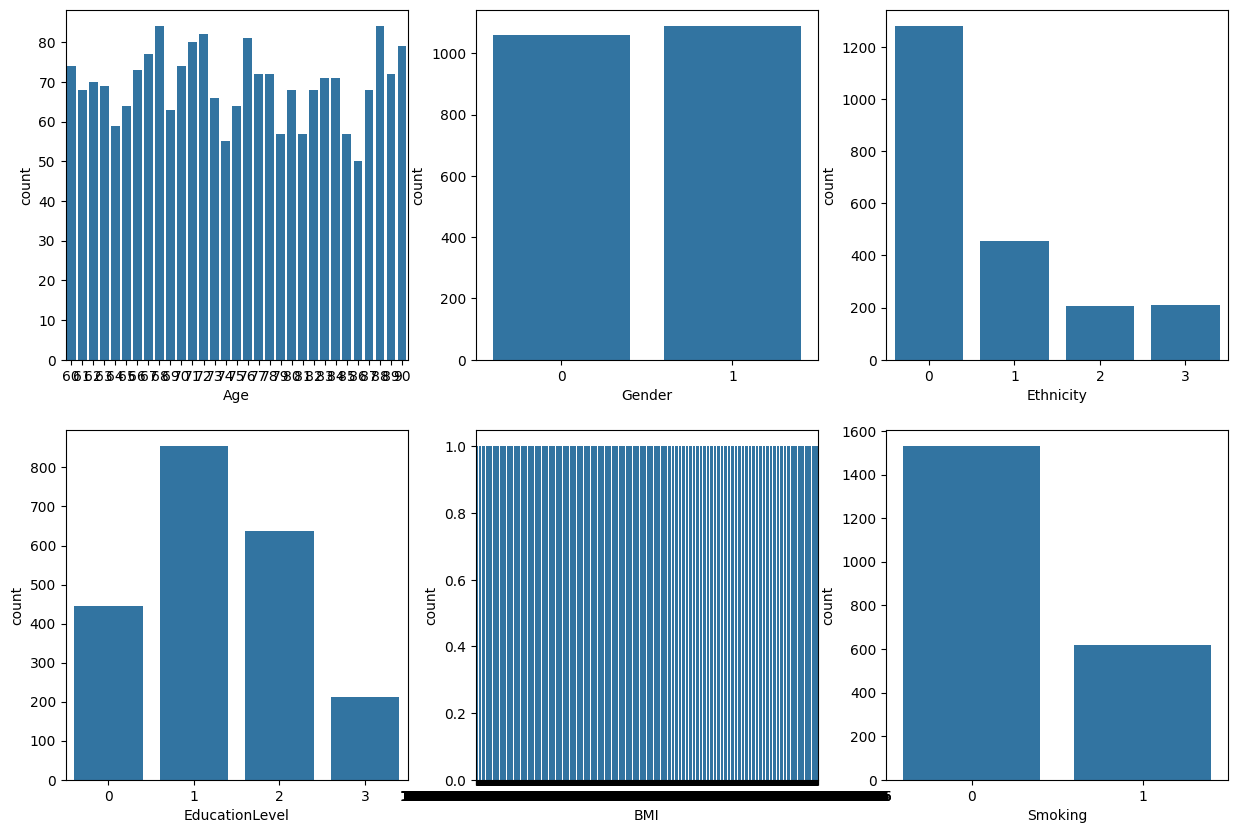

In [79]:
df1 = df[['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking']]
fig,axs = plt.subplots(2,3,figsize = (15,10))

column_index = 0

for i in range (2):
  for j in range (3):
    columns_name = df1.columns[column_index]
    sns.countplot(x = df1[columns_name], ax = axs[i,j])
    column_index = column_index +1


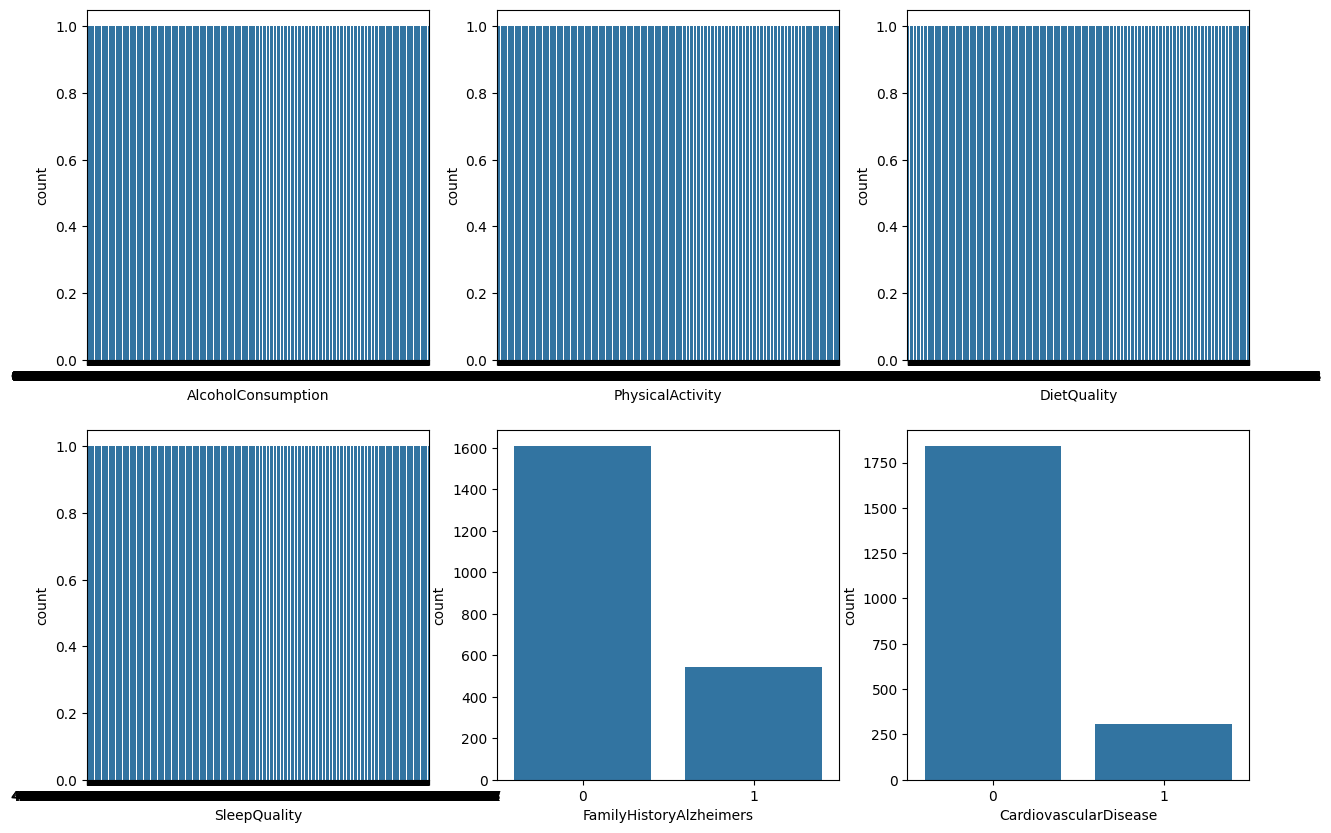

In [80]:
df2 = df[['AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality','FamilyHistoryAlzheimers', 'CardiovascularDisease']]
fig,axs = plt.subplots(2,3,figsize = (15,10))

column_index = 0

for i in range (2):
  for j in range (3):
    columns_name = df2.columns[column_index]
    sns.countplot(x = df2[columns_name], ax = axs[i,j])
    column_index = column_index +1


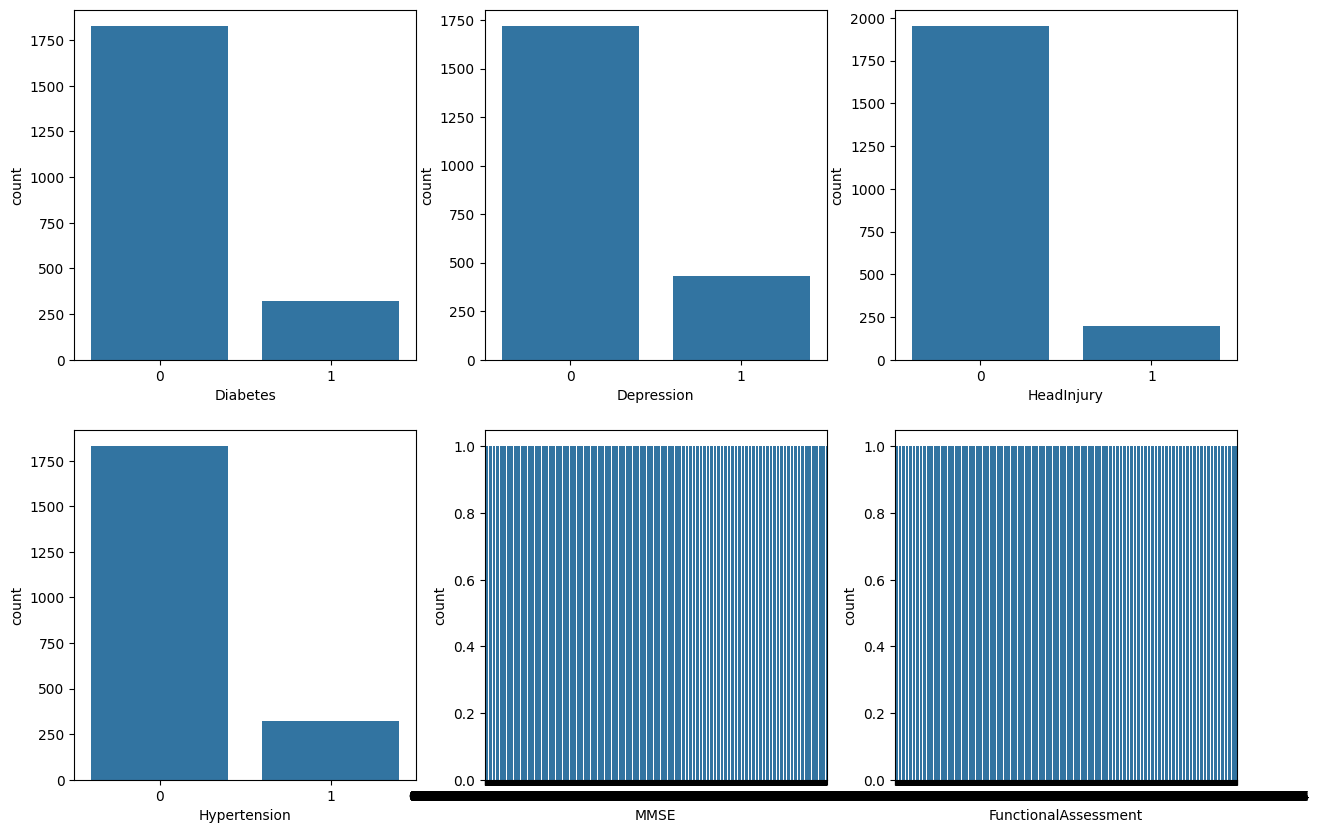

In [81]:
df3 = df[['Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'MMSE',
       'FunctionalAssessment']]
fig,axs = plt.subplots(2,3,figsize = (15,10))

column_index = 0

for i in range (2):
  for j in range (3):
    columns_name = df3.columns[column_index]
    sns.countplot(x = df3[columns_name], ax = axs[i,j])
    column_index = column_index +1


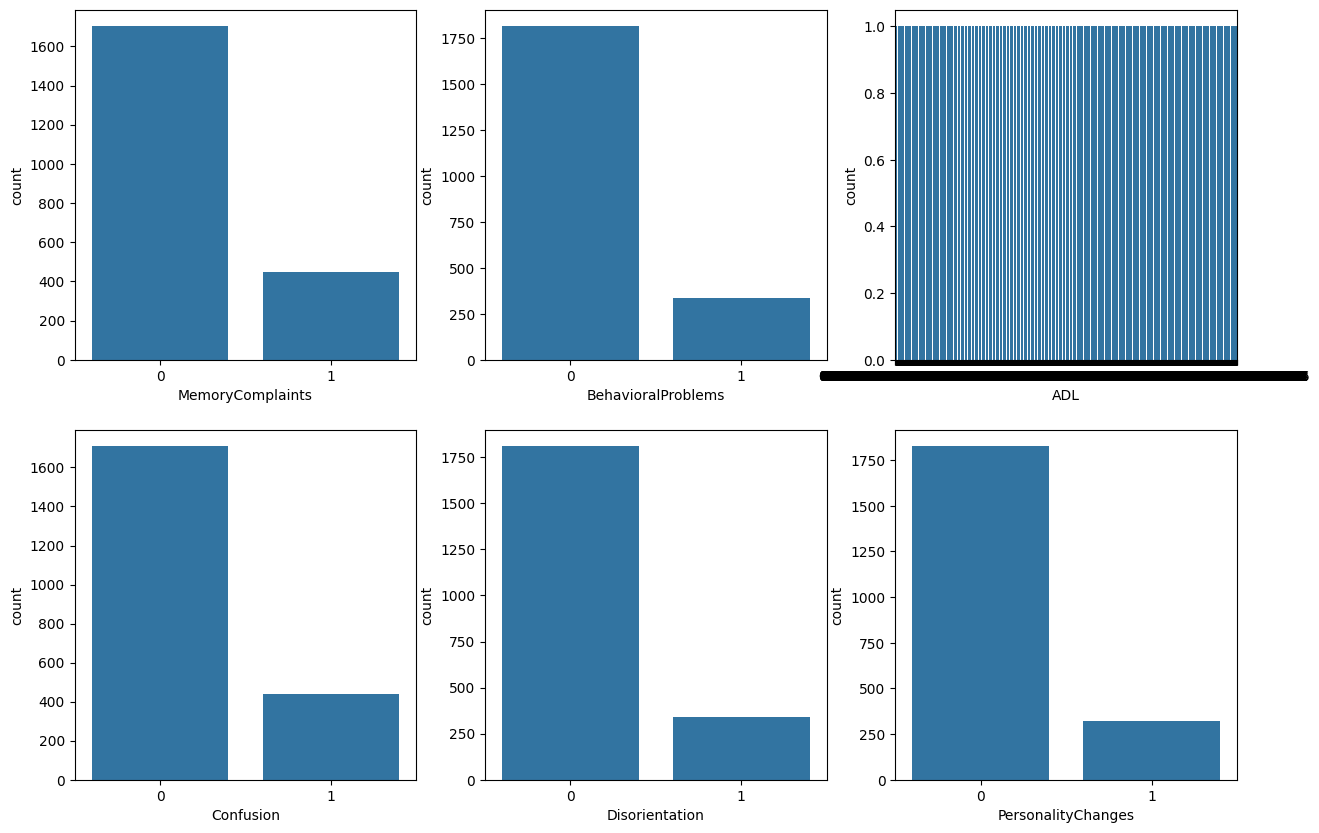

In [82]:
df4 = df[['MemoryComplaints', 'BehavioralProblems', 'ADL',
       'Confusion', 'Disorientation', 'PersonalityChanges']]
fig,axs = plt.subplots(2,3,figsize = (15,10))

column_index = 0

for i in range (2):
  for j in range (3):
    columns_name = df4.columns[column_index]
    sns.countplot(x = df4[columns_name], ax = axs[i,j])
    column_index = column_index +1


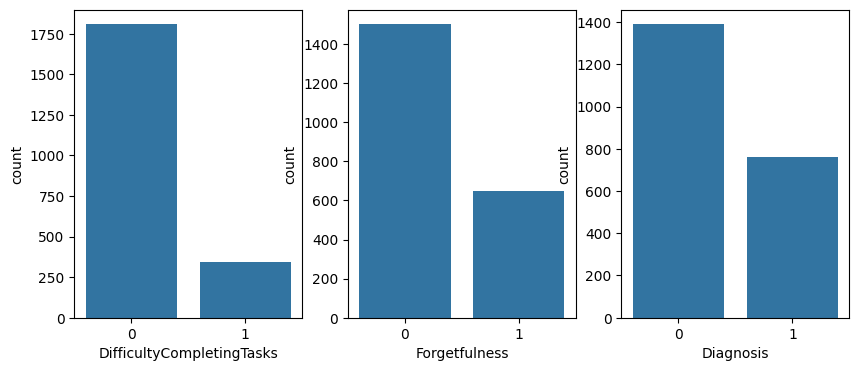

In [83]:
df5 = df[['DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis']]
fig,axs = plt.subplots(1,3,figsize = (10,4))

column_index = 0


for j in range (3):
  columns_name = df5.columns[column_index]
  sns.countplot(x = df5[columns_name], ax = axs[j])
  column_index = column_index +1


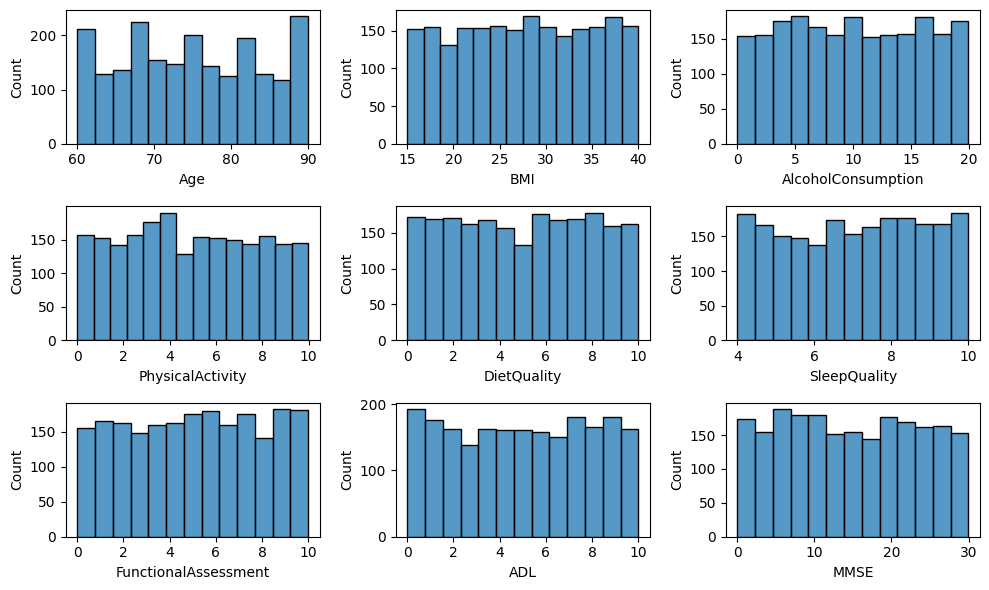

In [84]:
df_hist = df[['Age','BMI','AlcoholConsumption','PhysicalActivity','DietQuality','SleepQuality','FunctionalAssessment','ADL','MMSE',]]

fig, axs = plt.subplots(3,3,figsize = (10,6))

col_index = 0

for i in range(3):
  for j in range(3):
    sns.histplot(data = df_hist,x = df_hist.columns[col_index],ax = axs[i,j])
    col_index += 1

plt.tight_layout()
plt.show()


A patir do histogramas e gráficos de 'counts' podemos obsevar que as features não possui nenhum outlier.

Outro ponto a ressaltar é a que as features de valors continuos não possuí uma distribuição normal.

## Matriz de corrrelação

<Axes: >

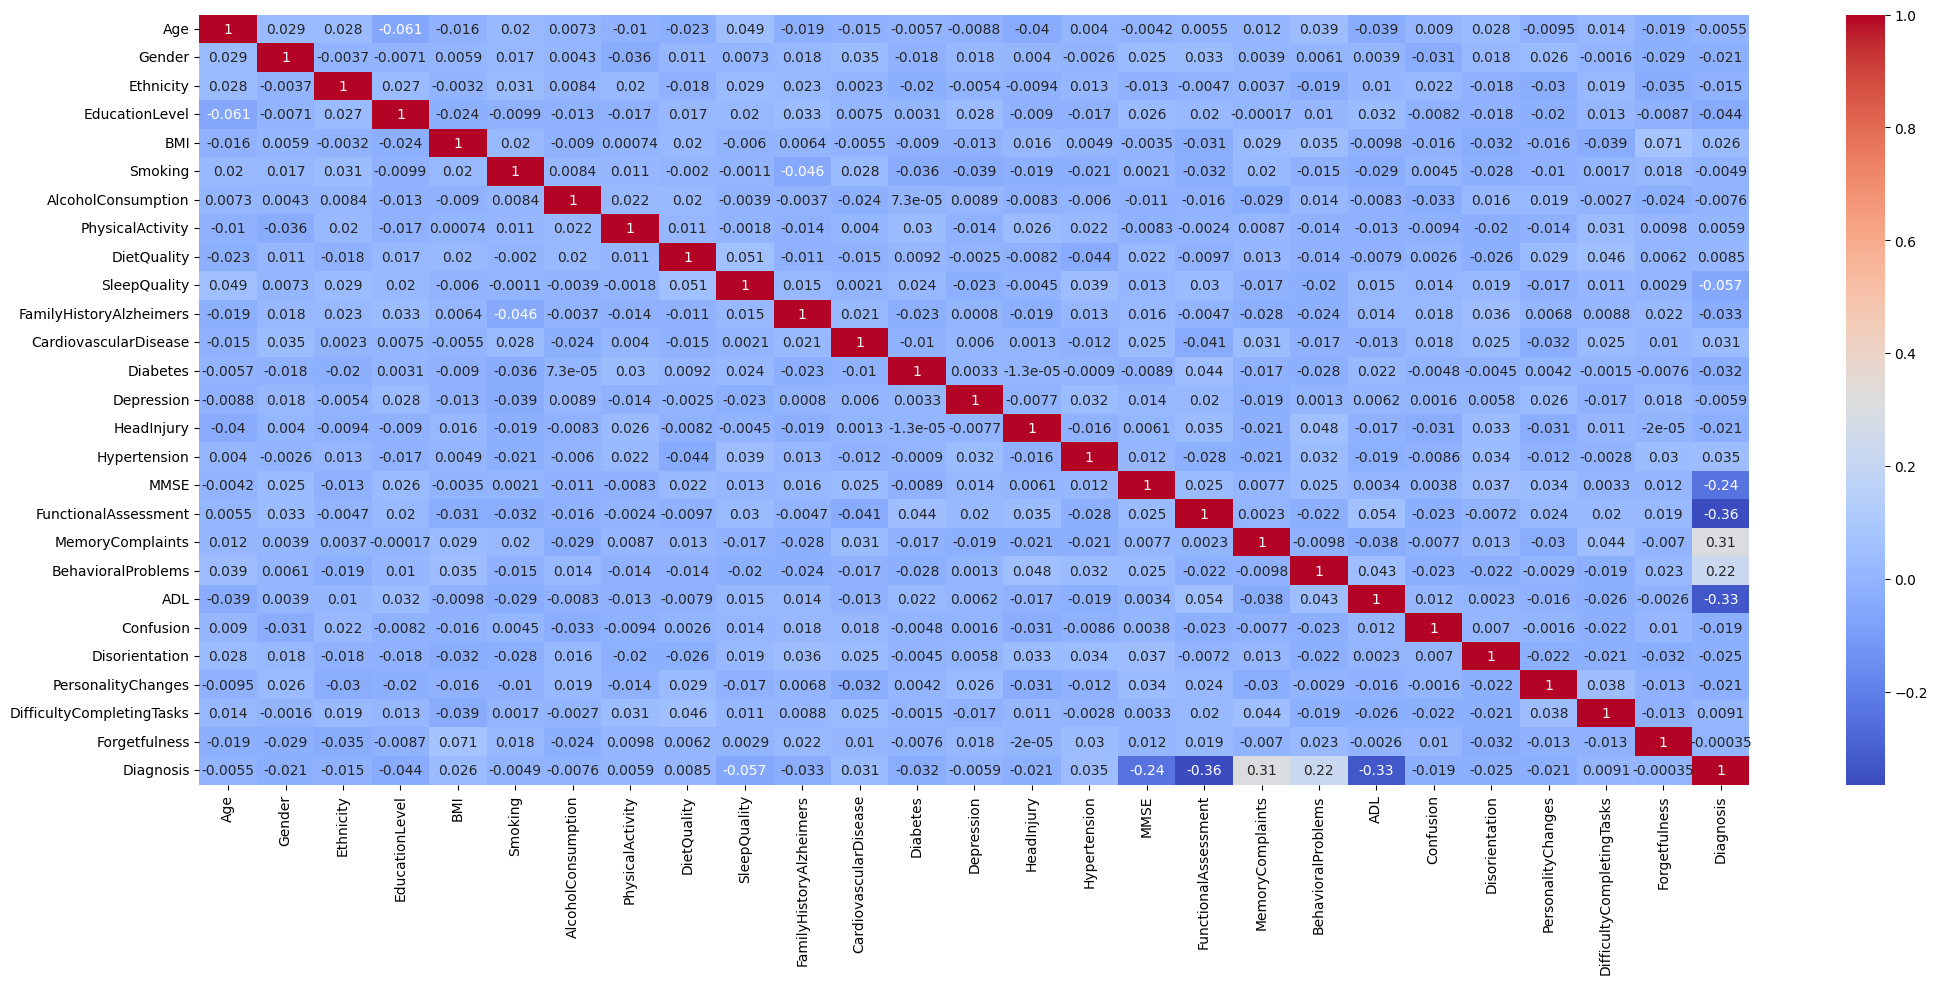

In [85]:
corr = df.corr()
plt.figure(figsize = (25,10))
sns.heatmap(data = corr, cmap = 'coolwarm',annot= True )

# Seleção de Features

In [86]:
df.columns.value_counts().sum()

27

Como ao todo são 27 colunas, será feita uma seleção das features baseados em f_class e kbest

In [87]:
from sklearn.feature_selection import f_classif, SelectKBest,chi2

In [88]:
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2149 non-null   int64  
 1   Gender                     2149 non-null   int64  
 2   Ethnicity                  2149 non-null   int64  
 3   EducationLevel             2149 non-null   int64  
 4   BMI                        2149 non-null   float64
 5   Smoking                    2149 non-null   int64  
 6   AlcoholConsumption         2149 non-null   float64
 7   PhysicalActivity           2149 non-null   float64
 8   DietQuality                2149 non-null   float64
 9   SleepQuality               2149 non-null   float64
 10  FamilyHistoryAlzheimers    2149 non-null   int64  
 11  CardiovascularDisease      2149 non-null   int64  
 12  Diabetes                   2149 non-null   int64  
 13  Depression                 2149 non-null   int64

## Seleção de Features com f_classif

In [90]:
## selecionando os dados continuos

f_classif_selector  = SelectKBest(score_func = f_classif, k = 5)

X_f = df[['BMI','AlcoholConsumption','PhysicalActivity','DietQuality','SleepQuality','MMSE','FunctionalAssessment','ADL']]
y = df.Diagnosis

values_features = f_classif_selector.fit_transform(X_f,y)
values_features

array([[22.92774923,  9.02567867, 21.46353236,  6.51887697,  1.72588346],
       [26.82768119,  7.15129274, 20.61326731,  7.1186955 ,  2.59242413],
       [17.79588244,  9.67357416,  7.35624862,  5.89507735,  7.11954774],
       ...,
       [15.47647896,  5.76946355, 17.0110031 ,  1.97213657,  5.03633399],
       [15.29991122,  8.32287396,  4.03049088,  5.17389096,  3.78539871],
       [33.28973831,  9.87871052, 11.11477737,  6.30754331,  8.32756301]])

In [91]:
cols = f_classif_selector.get_support(indices = True)
df_BO5_feature_fclassif = X_f.iloc[:,cols]

df_BO5_feature_fclassif.columns

Index(['BMI', 'SleepQuality', 'MMSE', 'FunctionalAssessment', 'ADL'], dtype='object')

In [92]:
df_BO5_feature_fclassif.head()

,BMI,SleepQuality,MMSE,FunctionalAssessment,ADL
0,22.927749,9.025679,21.463532,6.518877,1.725883
1,26.827681,7.151293,20.613267,7.118696,2.592424
2,17.795882,9.673574,7.356249,5.895077,7.119548
3,33.800817,8.392554,13.991127,8.965106,6.481226
4,20.716974,5.597238,13.517609,6.045039,0.014691


## Seleção de Features com chi2

In [93]:
## selecionando os dados categoricos

ch2_selector  = SelectKBest(score_func = chi2, k = 10)

X_chi2 = df.drop(columns = ['Diagnosis','BMI','AlcoholConsumption','PhysicalActivity','DietQuality','SleepQuality','MMSE','FunctionalAssessment','ADL'],axis = 1)
y = df.Diagnosis

values_features = ch2_selector .fit_transform(X_chi2,y)
values_features

array([[2, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [2, 0, 0, ..., 1, 1, 0]])

In [94]:
cols = ch2_selector.get_support(indices = True)
df_BO5_feature_chi2 = X_chi2.iloc[:,cols]

df_BO5_feature_chi2.columns

Index(['EducationLevel', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'HeadInjury', 'Hypertension', 'MemoryComplaints',
       'BehavioralProblems', 'Disorientation', 'PersonalityChanges'],
      dtype='object')

In [95]:
df_BO5_feature_chi2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   EducationLevel           2149 non-null   int64
 1   FamilyHistoryAlzheimers  2149 non-null   int64
 2   CardiovascularDisease    2149 non-null   int64
 3   Diabetes                 2149 non-null   int64
 4   HeadInjury               2149 non-null   int64
 5   Hypertension             2149 non-null   int64
 6   MemoryComplaints         2149 non-null   int64
 7   BehavioralProblems       2149 non-null   int64
 8   Disorientation           2149 non-null   int64
 9   PersonalityChanges       2149 non-null   int64
dtypes: int64(10)
memory usage: 168.0 KB


## Juntando as features

In [96]:
df_top10_features = pd.concat([df_BO5_feature_chi2,df_BO5_feature_fclassif],axis =1)
df_top10_features.head()

,EducationLevel,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,HeadInjury,Hypertension,MemoryComplaints,BehavioralProblems,Disorientation,PersonalityChanges,BMI,SleepQuality,MMSE,FunctionalAssessment,ADL
0,2,0,0,1,0,0,0,0,0,0,22.927749,9.025679,21.463532,6.518877,1.725883
1,0,0,0,0,0,0,0,0,0,0,26.827681,7.151293,20.613267,7.118696,2.592424
2,1,1,0,0,0,0,0,0,1,0,17.795882,9.673574,7.356249,5.895077,7.119548
3,1,0,0,0,0,0,0,1,0,0,33.800817,8.392554,13.991127,8.965106,6.481226
4,0,0,0,0,0,0,0,0,0,1,20.716974,5.597238,13.517609,6.045039,0.014691


# Observando o balanço do Target

<Axes: xlabel='Diagnosis', ylabel='count'>

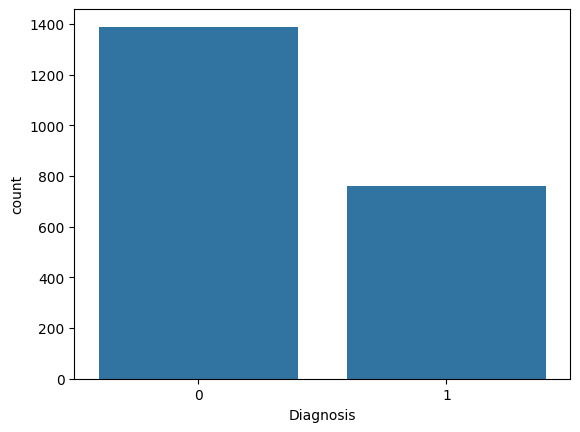

In [97]:
sns.countplot(data = df, x = df['Diagnosis'])

A partir do gráfico é possível observar o desbalanceamento entre as quantidades de pessoas diagnosticadas com e sem Alzheimer, assim, será feito o rebalanceamento utilizando a técnica de SMOTE

## Balanceando o gráfico

In [98]:
from imblearn.over_sampling import SMOTE

In [99]:
X = df_top10_features
y = df.Diagnosis

Seed = 1337
np.random.seed(seed = Seed)

smt = SMOTE(random_state = Seed)

X,y = smt.fit_resample(X,y)

df_balanced = pd.concat([X,y], axis = 1)
df_balanced.head()

,EducationLevel,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,HeadInjury,Hypertension,MemoryComplaints,BehavioralProblems,Disorientation,PersonalityChanges,BMI,SleepQuality,MMSE,FunctionalAssessment,ADL,Diagnosis
0,2,0,0,1,0,0,0,0,0,0,22.927749,9.025679,21.463532,6.518877,1.725883,0
1,0,0,0,0,0,0,0,0,0,0,26.827681,7.151293,20.613267,7.118696,2.592424,0
2,1,1,0,0,0,0,0,0,1,0,17.795882,9.673574,7.356249,5.895077,7.119548,0
3,1,0,0,0,0,0,0,1,0,0,33.800817,8.392554,13.991127,8.965106,6.481226,0
4,0,0,0,0,0,0,0,0,0,1,20.716974,5.597238,13.517609,6.045039,0.014691,0


<Axes: xlabel='Diagnosis', ylabel='count'>

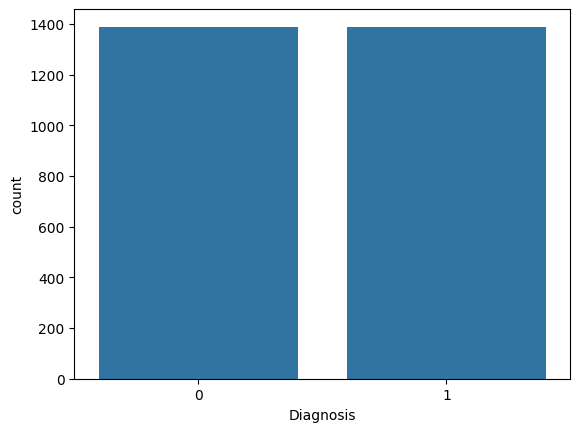

In [100]:
sns.countplot(data = df_balanced, x = df_balanced.Diagnosis)

# Normalização dos dados

Como visto os gráfico de histograma, é possível observar que os dados não possuem uma distribuição normal, assim será utilizada a Normalização dos dados, essa etapa é essencial para deixar todos os dados no mesmo intervalo.

In [101]:
from sklearn.preprocessing import Normalizer

In [102]:
X = df_balanced.drop(columns = ['Diagnosis'], axis = 1)
y = df_balanced.Diagnosis

norm = Normalizer().fit_transform(X)
X_norm = pd.DataFrame(norm, columns = X.columns)
df_norm  = pd.concat([X_norm,y], axis = 1)


In [103]:
df_norm

,EducationLevel,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,HeadInjury,Hypertension,MemoryComplaints,BehavioralProblems,Disorientation,PersonalityChanges,BMI,SleepQuality,MMSE,FunctionalAssessment,ADL,Diagnosis
0,0.059807,0.000000,0.000000,0.029903,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.685617,0.269898,0.641832,0.194937,0.051610,0
1,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.757841,0.202013,0.582294,0.201092,0.073232,0
2,0.042531,0.042531,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.042531,0.000000,0.756877,0.411427,0.312869,0.250724,0.302802,0
3,0.025540,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.025540,0.000000,0.000000,0.863272,0.214346,0.357333,0.228968,0.165530,0
4,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.038326,0.793998,0.214520,0.518076,0.231682,0.000563,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2773,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.917683,0.322401,0.148636,0.107092,0.142667,1
2774,0.069731,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.034866,0.000000,0.000000,0.884832,0.144176,0.352570,0.080383,0.243805,1
2775,0.034414,0.000000,0.034414,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.663915,0.161038,0.716397,0.128956,0.032558,1
2776,0.055005,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.840661,0.173604,0.496559,0.078133,0.086315,1


# Criando Modelos ML

In [104]:
#Criando modelo de treino e test

X = df_balanced.drop(columns = ['Diagnosis'], axis = 1)
y = df_balanced.Diagnosis

SEED = 1337

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state = SEED)

In [105]:
X_train.shape

(2222, 15)

In [106]:
X_test.shape

(556, 15)

## Logistic Regression


In [107]:
from sklearn.linear_model import LogisticRegression

In [108]:
modelo_lr = LogisticRegression(random_state = SEED)

modelo_lr.fit(X_train,y_train)
y_pred_lr = modelo_lr.predict(X_test)

print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       271
           1       0.84      0.84      0.84       285

    accuracy                           0.83       556
   macro avg       0.83      0.83      0.83       556
weighted avg       0.83      0.83      0.83       556



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Cross Validation Logistc Regression

A função do cross validation vai permitir obsevar os resultado quando dividimos os espaços em partes e análisamos cada uma delas

In [109]:
score_val_lr = cross_val_score(modelo_lr,X,y, cv = 10)

print('A accuracia do modelo é de {} %'.format(score_val_lr.round(4)*100))
print('A médias das acurácia e de {} %'.format(score_val_lr.mean().round(4)*100))
print('O desvio padrão da acurácia é de {}'.format(score_val_lr.std().round(4)))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

A accuracia do modelo é de [84.17 83.09 83.45 80.58 78.42 74.82 85.25 80.94 77.98 75.81] %
A médias das acurácia e de 80.45 %
O desvio padrão da acurácia é de 0.0341


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

### Cruva ROC e AUC

A curva ROC e a pontuação AUC permite observar qual é o nível de separibilidade do nosso modelo, isso é, quão potente o nosso modelo é capaz de distiguir os valores binários entre as classes.

Pontuação AUC do modelo: 83.27 %


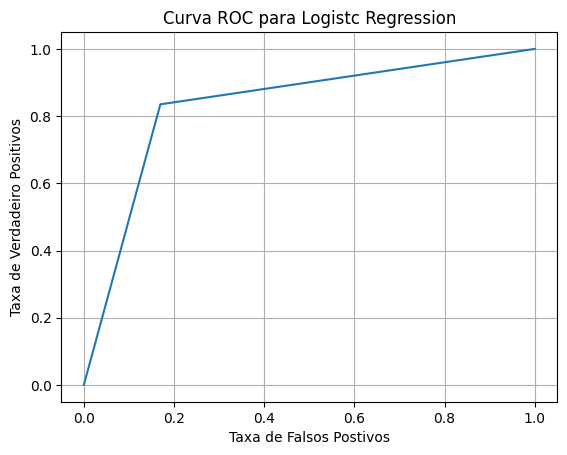

In [128]:
fpr, tpr, treshholds = roc_curve(y_test,y_pred_lr)
plt.plot(fpr, tpr)
plt.xlabel('Taxa de Falsos Postivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.title('Curva ROC para Logistc Regression')
plt.grid()

print('Pontuação AUC do modelo: {} %'.format(roc_auc_score(y_test,y_pred_lr).round(4)*100))

##SVC

In [111]:
modelo_svc = SVC()

modelo_svc.fit(X_train,y_train)
y_pred_svc = modelo_svc.predict(X_test)

print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78       271
           1       0.80      0.77      0.79       285

    accuracy                           0.79       556
   macro avg       0.79      0.79      0.79       556
weighted avg       0.79      0.79      0.79       556



### Cross validation SVC

In [112]:
score_val_svc = cross_val_score(modelo_svc,X,y, cv = 10)

print('A accuracia do modelo é de {} %'.format(score_val_svc.round(4)*100))
print('A médias das acurácia e de {} %'.format(score_val_svc.mean().round(4)*100))
print('O desvio padrão da acurácia é de {}'.format(score_val_svc.std().round(4)))


A accuracia do modelo é de [81.29 82.37 79.86 81.29 73.38 74.82 83.09 75.54 79.42 77.98] %
A médias das acurácia e de 78.91 %
O desvio padrão da acurácia é de 0.0319


### Curva ROC e AUC

Pontuação AUC do modelo: 78.63 %


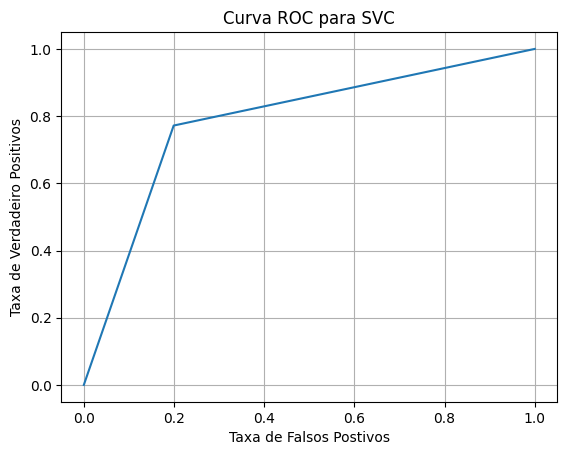

In [129]:

fpr, tpr, treshholds = roc_curve(y_test,y_pred_svc)
plt.plot(fpr, tpr)
plt.xlabel('Taxa de Falsos Postivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.title('Curva ROC para SVC')
plt.grid()

print('Pontuação AUC do modelo: {} %'.format(roc_auc_score(y_test,y_pred_svc).round(4)*100))

## Randon Forest Classifier

In [114]:
modelo_rfc = RandomForestClassifier()

modelo_rfc.fit(X_train,y_train)
y_pred_rcf = modelo_rfc.predict(X_test)

print(classification_report(y_test,y_pred_rcf))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       271
           1       0.97      0.89      0.93       285

    accuracy                           0.93       556
   macro avg       0.93      0.93      0.93       556
weighted avg       0.93      0.93      0.93       556



### Cross Validation RFC

In [115]:
score_val_rcf = cross_val_score(modelo_rfc,X,y,cv = 10)

print('A accuracia do modelo é de {} %'.format(score_val_rcf.round(4)*100))
print('A médias das acurácia e de {} %'.format(score_val_rcf.mean().round(4)*100))
print('O desvio padrão da acurácia é de {}'.format(score_val_rcf.std().round(4)))


A accuracia do modelo é de [96.04 96.76 96.76 96.4  93.53 81.29 92.09 89.93 89.53 84.12] %
A médias das acurácia e de 91.64999999999999 %
O desvio padrão da acurácia é de 0.0519


### Curva ROC e AUC

Pontuação AUC do modelo: 92.9 %


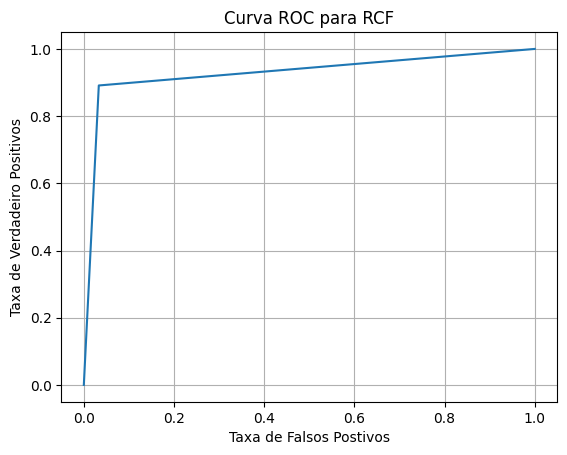

In [130]:
fpr, tpr, treshholds = roc_curve(y_test,y_pred_rcf)
plt.plot(fpr, tpr)
plt.xlabel('Taxa de Falsos Postivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.title('Curva ROC para RCF')
plt.grid()

print('Pontuação AUC do modelo: {} %'.format(roc_auc_score(y_test,y_pred_rcf).round(4)*100))

## Escolhendo o Modelo

A partir do Cross Validation, foi possível observar que o modelo com a melhor acurácia foi o RandonForestClassifier. Além disso, pelas análises gráfica da curva ROC e observando a pontuação AUC, temos que o RandomForestClassifier também possui valores altos, o que indica que esse modelo tem alta capacidade de distiguir os valores das classes

Assim, temos que o nosso modelo selecionado será o RandomForestClassifier

# Análisando os Hiper Parametros

Com a seleção do Randon Forest Classifier sendo o modelo principal, será feito a análise dos hiper paramentros desse modelo para encontrar os melhores valores.

Assim, para não consumir uma grande quantidade de tempo e ainda assim análisar o masso de espaço dos parametros, será utiliado o RandonSearchCV como o métrodo de análise dos parametros.

In [117]:
SEED = 32
np.random.seed (seed = SEED)

espacos_parametro = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [3,6,9,12],
    'min_samples_split': randint(8,128),
    'min_samples_leaf' : randint(32,128)
}


busca = RandomizedSearchCV(
    RandomForestClassifier(),
    espacos_parametro,
    cv = 10,
    random_state = SEED,
    n_iter = 64
)

busca.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=64,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [3, 6, 9, 12],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e7de0404040>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e7de4d93e20>},
                   random_state=32)

In [118]:
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.257394,0.009894,0.009867,0.000392,entropy,9,94,96,"{'criterion': 'entropy', 'max_depth': 9, 'min_...",0.887892,...,0.869369,0.869369,0.878378,0.860360,0.864865,0.833333,0.842342,0.866331,0.019032,38
1,0.322295,0.051484,0.013707,0.002152,gini,12,121,11,"{'criterion': 'gini', 'max_depth': 12, 'min_sa...",0.892377,...,0.882883,0.842342,0.851351,0.828829,0.806306,0.761261,0.837838,0.841567,0.037555,63
2,0.335428,0.054413,0.010637,0.000604,entropy,9,41,12,"{'criterion': 'entropy', 'max_depth': 9, 'min_...",0.932735,...,0.905405,0.878378,0.905405,0.873874,0.860360,0.851351,0.855856,0.883422,0.025144,7
3,0.254184,0.007559,0.009596,0.000252,entropy,12,97,42,"{'criterion': 'entropy', 'max_depth': 12, 'min...",0.910314,...,0.869369,0.869369,0.869369,0.882883,0.860360,0.828829,0.842342,0.865887,0.028049,39
4,0.227197,0.006413,0.009892,0.000574,gini,9,114,18,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.887892,...,0.869369,0.842342,0.882883,0.851351,0.860360,0.837838,0.864865,0.861384,0.017519,45


In [119]:
print(busca.best_estimator_)

RandomForestClassifier(criterion='entropy', max_depth=12, min_samples_leaf=32,
                       min_samples_split=71)


## Validação do modelo com Nested Score Validation

Apesar de ter encontrado os melhores parametros, é necessário fazer uma nova cross validation do modelo para garantir que não houve overfitting

In [120]:
from sklearn.model_selection import KFold
n_outer = KFold(n_splits = 5, shuffle = True, random_state = SEED)

nested_score = cross_val_score(busca,X_train,y_train,cv = n_outer, scoring = 'accuracy',n_jobs=-1)
print(f'Acurácia em cada fold do outer loop: {nested_score.round(4)}')
print(f'Média da acurácia: {nested_score.mean().round(4)}')
print(f'Desvio padrão da acurácia: {nested_score.std().round(4)}')

Acurácia em cada fold do outer loop: [0.9079 0.8944 0.8739 0.8761 0.8784]
Média da acurácia: 0.8861
Desvio padrão da acurácia: 0.013


# Resultados e Análises

Inicialmente, observamos que temos 27 features e que a partir diso foi decidido a redução e aobservação das principais features do dataset, assim utilziando o métodos estatístico f_classif para dados de classificação e chi² para dados contínuos chegamso a 15 principais features que são: 'BMI', 'SleepQuality', 'MMSE', 'FunctionalAssessment', 'ADL', 'EducationLevel', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'HeadInjury', 'Hypertension', 'MemoryComplaints', 'BehavioralProblems', 'Disorientation', 'PersonalityChanges'.

Um ponto a ser obsevado e a ausência da feature de idade ('Age'), já que uma das premissas populares é que a idade está altamente relacionada com a doença mas os teste mostra que n foi relrevante para determinar a possível presença dela, além disso, a presença da feature 'Family History Alzheimers' mostra que há sim uma relação à doença


Por se tratar de criação de modelos binários, temos a utilização de modelos como Logistic Regression, Support Verotiral Classifier (SVC) e Randon Forest Classife, que são modelos recomendados para problemas de predição binário, porém a escolha do modelo foi feito com a utiliziação da ferramenta 'Classification Report' para observar a precisão, recall e o F1-score, em que aquele que possui o maior valor se demonstrava mais preciso, Cruva ROC e pontuação AUC que mostra para nós o poder de distição de valores binário de cada modelo e por fim o cross validation para observar o valor de accurácia de cada parte de cada modelo, Assim chegamos que o melhor modelo é o Random Forest Classifier e assim seguimos como ele para as predições.


Por fim, foi feita a validação dos hiper parametro e encontrado o melhor modelo para predição utilizando o Random Forest Classifier. Assim, concluimos o objetio desse projeto, em que é possível encontrar um modelo que preve se o paciente tem ou não alzheimer a partir de determinadas característica relacionado ao estilo de vida, testes fisiológico e cognitivo, sintomas médicos relacionado a doença e detalhes demográfico.


Vale ressaltar que apesar do modelo ter uma capacidade alta de predição, não se deve levar o resultado obtido como verdade única caso, assim, deve-se procurar ajuda médica especializada caso algum sintoma venha ocasionar e salietar que o atual projeto teve seu cunho estudantilm baseado em dados públicos.